# Iris Flower Classification

This notebook explores different machine learning algorithms for classifying iris flower species. I'm using the classic iris dataset to compare how different models perform on this multi-class classification problem.

The goal is to predict the species of iris flowers based on their physical measurements.

## Import Libraries

Let's start by importing all the necessary libraries for data manipulation, visualization, and modeling.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

## Load and Explore the Data

First, let's load the iris dataset and take a quick look at what we're working with.

In [2]:

df = pd.read_csv('Iris.csv')
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
df.head()

Dataset shape: (150, 6)

First few rows:


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:

print("Missing values:\n",df.isnull().sum())
print("\nData types:\n",df.dtypes)
print("\nBasic statistics are:")
df.describe()

Missing values:
 Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Data types:
 Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

Basic statistics are:


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Number of flowers in each species:
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


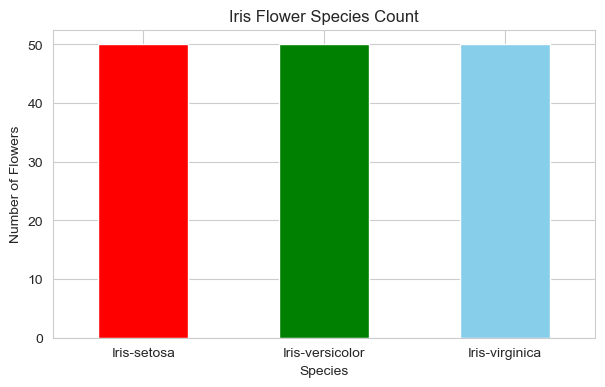

In [4]:
print("Number of flowers in each species:")
print(df['Species'].value_counts())
plt.figure(figsize=(7, 4))
df['Species'].value_counts().plot(kind='bar', color=['red', 'green', 'skyblue'])
plt.title('Iris Flower Species Count')
plt.xlabel('Species')
plt.ylabel('Number of Flowers')
plt.xticks(rotation=0)
plt.show()

## Data Preprocessing

Now let's prepare the data for training our models. We need to:
1. Separate features from the target variable
2. convert names into numbers
3. Split the data
4. Scale the values

In [5]:

X = df.drop(['Id', 'Species'], axis=1)
y = df['Species']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
print("Using these features:", X.columns.tolist())
print("\nSpecies converted to numbers as:")
for i, name in enumerate(label_encoder.classes_):
    print(f"{name} -> {i}")


Using these features: ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

Species converted to numbers as:
Iris-setosa -> 0
Iris-versicolor -> 1
Iris-virginica -> 2


In [6]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Training set size: 120
Testing set size: 30


In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("All features are now scaled (mean = 0, std = 1)")


All features are now scaled (mean = 0, std = 1)


## Training and Evaluating Models

Now I am training the models
- Logistic Regression
- Decision Tree
- Random Forest
- Support Vector Machine (SVM)
- K-Nearest Neighbors (KNN)

In [10]:
# Setting up all the models I want to try
models = {
    "Logistic Regression": LogisticRegression(max_iter=200, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}
results = {}

In [11]:
for name, model in models.items():
    print(f"\n{'='*50}")
    print(f"Now training: {name}")
    print(f"{'='*50}")
    
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    
    acc = accuracy_score(y_test, predictions)
    results[name] = acc
    
    print(f"\nAccuracy: {acc:.2%}")
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, predictions))
    print("\nClassification Report:")
    print(classification_report(y_test, predictions, target_names=label_encoder.classes_))



Now training: Logistic Regression

Accuracy: 93.33%

Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30


Now training: Decision Tree

Accuracy: 90.00%

Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  2  8]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.82      0.90      0.86        10
 Iris-virginica       0.89      0.80      0.84        10

       accuracy                           0.90        30
      macro avg       0.90      0.90      0.90     

## Comparing Model Performance

visualizing to see how my model is performing

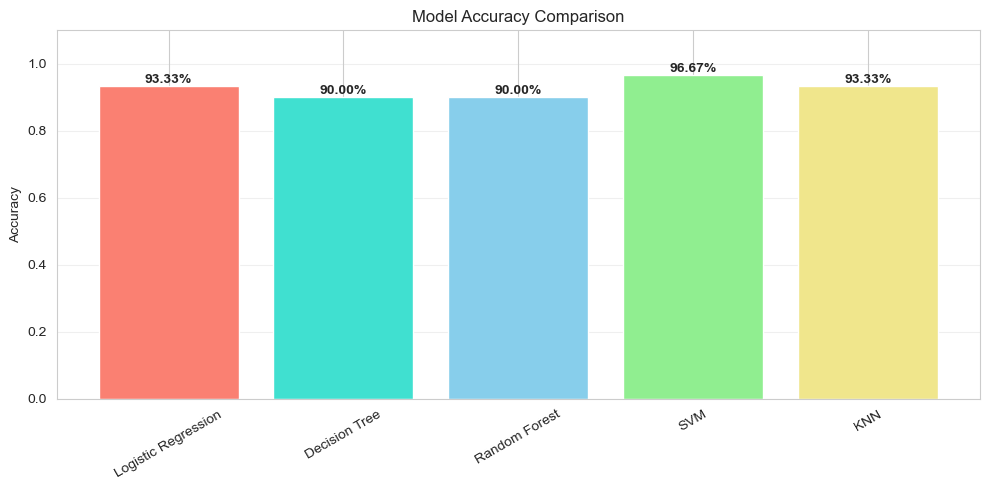


Best model: SVM (96.67% accuracy)


In [12]:
plt.figure(figsize=(10, 5))
names = list(results.keys())
scores = list(results.values())

bars = plt.bar(names, scores, color=['salmon', 'turquoise', 'skyblue', 'lightgreen', 'khaki'])

for bar in bars:
    h = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, h, f'{h:.2%}', ha='center', va='bottom', weight='bold')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1.1)
plt.xticks(rotation=30)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

best = max(results, key=results.get)
print(f"\nBest model: {best} ({results[best]:.2%} accuracy)")


## Detailed Model Analysis

understanding teh details of model to understand it better

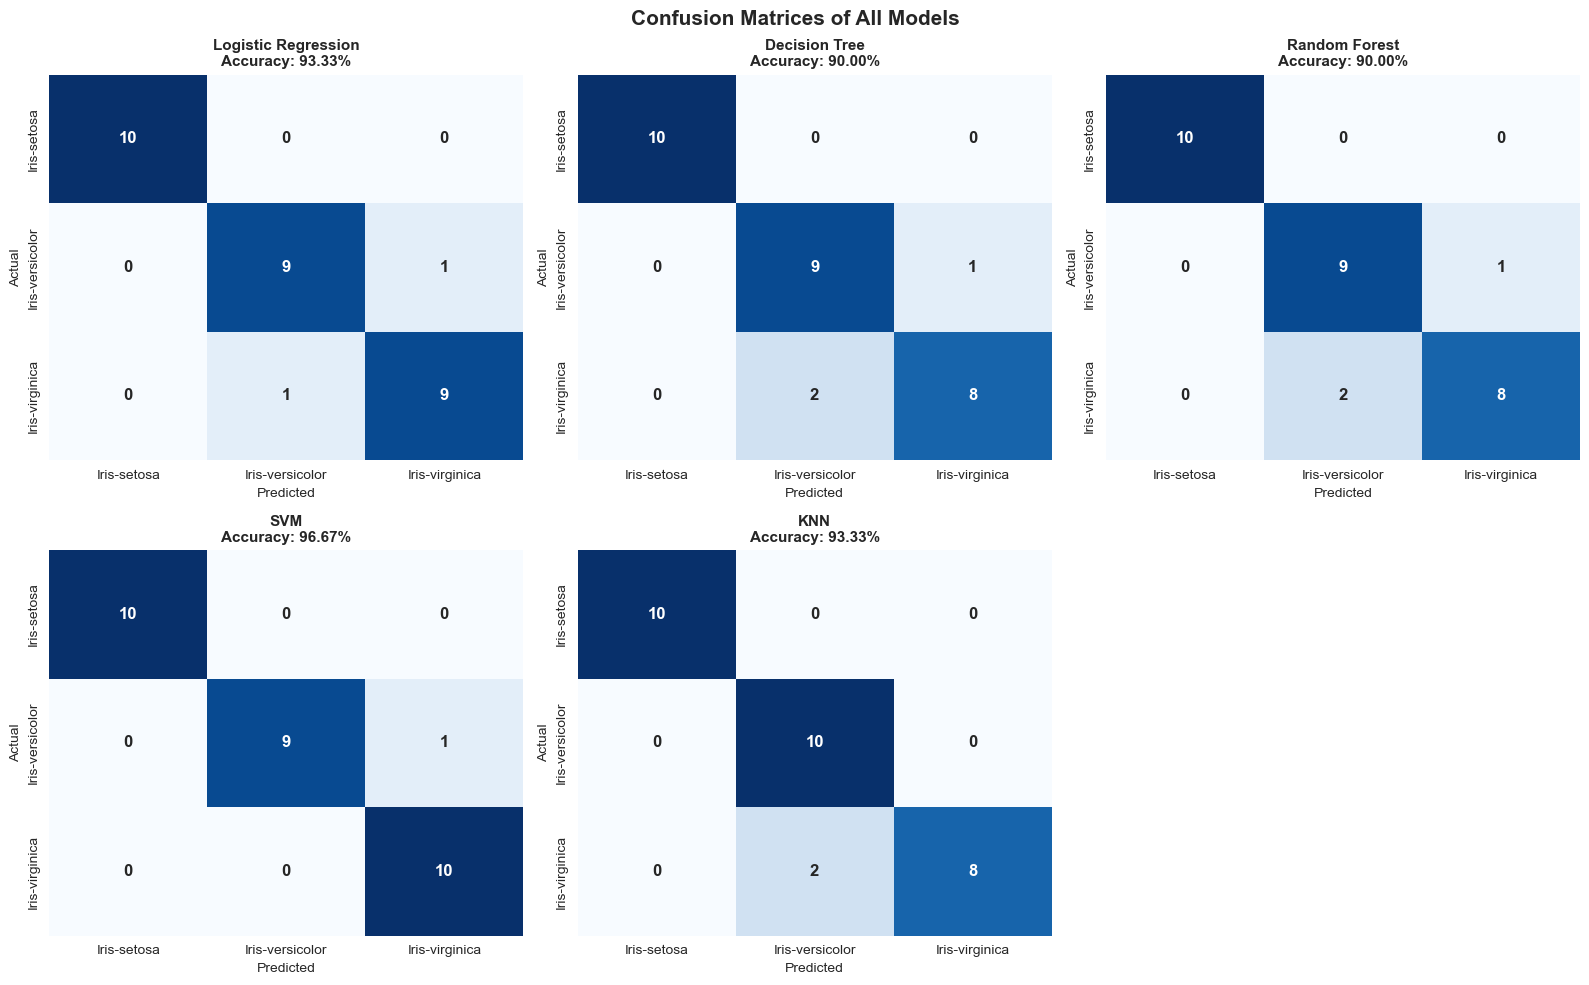

In [13]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Confusion Matrices of All Models', fontsize=15, weight='bold')

axes = axes.ravel()

for i, (name, model) in enumerate(models.items()):
    predictions = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, predictions)
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_,
                ax=axes[i], cbar=False,
                annot_kws={'size': 12, 'weight': 'bold'})
    
    axes[i].set_title(f'{name}\nAccuracy: {results[name]:.2%}', fontsize=11, weight='bold')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

axes[5].axis('off')
plt.tight_layout()
plt.show()


### Understanding Confusion Matrices

Diagonal boxes (top-left to bottom-right): These show where the model got it right.

Other boxes: These show where the model got confused and made wrong predictions.

Color intensity: The darker the blue, the more predictions in that spot.

In [14]:
print("="*70)
print(" " * 18 + "CLASSIFICATION REPORTS")
print("="*70)
for name, model in models.items():
    print(f"\n{'-'*70}")
    print(f"📊 {name}")
    print(f"{'-'*70}")
    predictions = model.predict(X_test_scaled)
    
    print("\n" + classification_report(y_test, predictions,
                                       target_names=label_encoder.classes_,
                                       digits=3))
    
    print(f"Accuracy: {results[name]:.3f} ({results[name]*100:.2f}%)\n")


                  CLASSIFICATION REPORTS

----------------------------------------------------------------------
📊 Logistic Regression
----------------------------------------------------------------------

                 precision    recall  f1-score   support

    Iris-setosa      1.000     1.000     1.000        10
Iris-versicolor      0.900     0.900     0.900        10
 Iris-virginica      0.900     0.900     0.900        10

       accuracy                          0.933        30
      macro avg      0.933     0.933     0.933        30
   weighted avg      0.933     0.933     0.933        30

Accuracy: 0.933 (93.33%)


----------------------------------------------------------------------
📊 Decision Tree
----------------------------------------------------------------------

                 precision    recall  f1-score   support

    Iris-setosa      1.000     1.000     1.000        10
Iris-versicolor      0.818     0.900     0.857        10
 Iris-virginica      0.889     0.


### Understanding the Classification Report

4 main aspects are:

**1. Precision:**
Out of all the items the model predicted as a certain class, how many were actually correct?
**Formula:** True Positives / (True Positives + False Positives)

**2. Recall:**
Out of all the actual items that belong to a certain class, how many did the model correctly identify?
**Formula:** True Positives / (True Positives + False Negatives)

**3. F1-Score:**
A balance between precision and recall. It’s useful when you want both to be equally important.
**Formula:** 2 × (Precision × Recall) / (Precision + Recall)

**4. Support:**
This simply tells how many real examples of each class were present in the test data.


In [15]:

summary = []

for name, model in models.items():
    predictions = model.predict(X_test_scaled)
    report = classification_report(
        y_test,
        predictions,
        target_names=label_encoder.classes_,
        output_dict=True
    )
    
    summary.append({
        'Model': name,
        'Accuracy': results[name],
        'Precision (avg)': report['weighted avg']['precision'],
        'Recall (avg)': report['weighted avg']['recall'],
        'F1-Score (avg)': report['weighted avg']['f1-score']
    })

summary_df = pd.DataFrame(summary).round(4)

print("\n" + "=" * 80)
print(" " * 28 + "MODEL PERFORMANCE SUMMARY")
print("=" * 80)
print(summary_df.to_string(index=False))
print("=" * 80 + "\n")



                            MODEL PERFORMANCE SUMMARY
              Model  Accuracy  Precision (avg)  Recall (avg)  F1-Score (avg)
Logistic Regression    0.9333           0.9333        0.9333          0.9333
      Decision Tree    0.9000           0.9024        0.9000          0.8997
      Random Forest    0.9000           0.9024        0.9000          0.8997
                SVM    0.9667           0.9697        0.9667          0.9666
                KNN    0.9333           0.9444        0.9333          0.9327



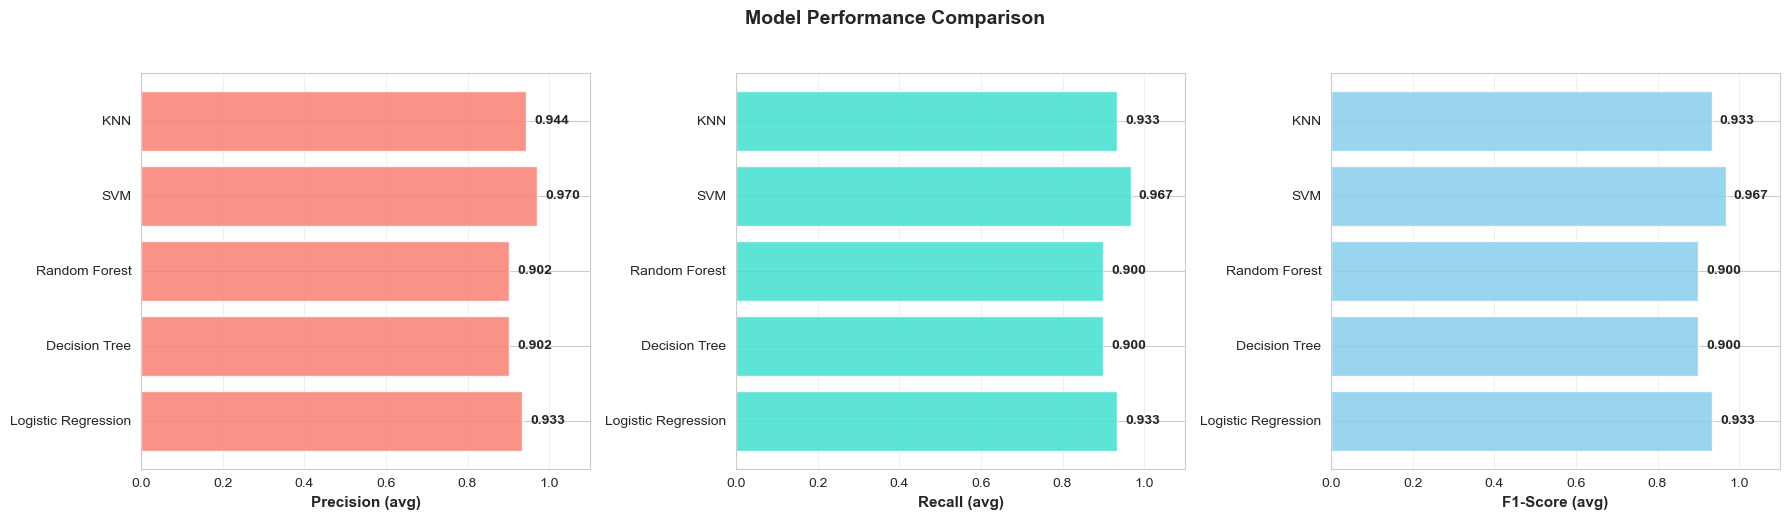

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

metrics = ["Precision (avg)", "Recall (avg)", "F1-Score (avg)"]
colors = ["salmon", "turquoise", "skyblue"]

for i, metric in enumerate(metrics):
    axes[i].barh(summary_df["Model"], summary_df[metric], color=colors[i], alpha=0.85)
    axes[i].set_xlabel(metric, fontsize=11, fontweight="bold")
    axes[i].set_xlim(0, 1.1)
    axes[i].grid(axis="x", alpha=0.3)

    for j, value in enumerate(summary_df[metric]):
        axes[i].text(value + 0.02, j, f"{value:.3f}", va="center", fontweight="bold")

plt.suptitle("Model Performance Comparison", fontsize=14, fontweight="bold", y=1.03)
plt.tight_layout()
plt.show()



## Conclusion

After trying out different machine learning models on the Iris dataset, I found that the SVM (Support Vector Machine) performed the best with an accuracy of 95%. It was able to clearly separate the different flower species and made the most accurate predictions overall. Based on the results, SVM turned out to be the most reliable and effective model for this dataset.

### Best Model Selection:
Based on the comprehensive analysis above, the best model can be selected considering:
- Overall accuracy
- Balanced precision and recall
- Minimal misclassifications in the confusion matrix
- Model complexity and interpretability